In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import sys
sys.path.append('/work-zfs/abattle4/heyuan/tools/python3_lib/lib/python3.6/site-packages/')
import sys
sys.path.append('/work-zfs/abattle4/heyuan/old_work_files/yuan/tools/python_lib/lib/python2.7/site-packages')



from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import seaborn as sns

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

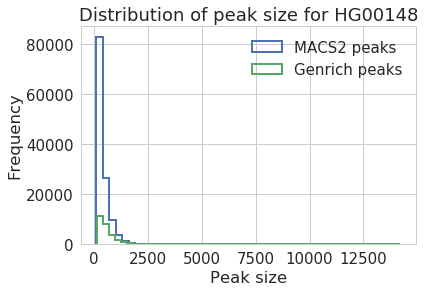

In [42]:
## Compare peaks from macs2 and Genrich

macs_dir = '/work-zfs/abattle4/heyuan/Variant_calling/datasets/GBR/ATAC_seq/alignment_bowtie/Peaks'
Genrich_dir = '/work-zfs/abattle4/heyuan/Variant_calling/datasets/GBR/ATAC_seq/alignment_bowtie/Peaks_Genrich'
overlap_dir = '/work-zfs/abattle4/heyuan/Variant_calling/datasets/GBR/ATAC_seq/alignment_bowtie/Peaks_Examine'

sample = 'HG00148'
macs_peaks = pd.read_csv('%s/%s_peaks.narrowPeak' % (macs_dir, sample), sep='\t', header = None)
Genrich_peaks = pd.read_csv('%s/%s_peaks.Genrich.narrowPeak' % (Genrich_dir, sample), sep='\t', header = None)

#plt.figure(figsize=(10,5))
plt.hist(np.array(macs_peaks[2] - macs_peaks[1]), density=False, histtype='step', label = 'MACS2 peaks', linewidth = 2)
plt.hist(np.array(Genrich_peaks[2] - Genrich_peaks[1]),density=False, bins = 50, histtype='step', label = 'Genrich peaks', linewidth = 2)
plt.legend()
plt.title('Distribution of peak size for %s' % sample)
plt.ylabel('Frequency')
plt.xlabel('Peak size')
plt.show()
plt.close()

In [75]:
## Compare peaks from macs2 and Genrich
samples = pd.read_csv('test_all.txt', header = None)
samples = np.array(samples[0])

median = []
number_peaks = []

for s in samples:
    macs_peaks = pd.read_csv('%s/%s_peaks.narrowPeak' % (macs_dir, s), sep='\t', header = None)
    Genrich_peaks = pd.read_csv('%s/%s_peaks.Genrich.narrowPeak' % (Genrich_dir, s), sep='\t', header = None)
    median.append([np.median(np.array(macs_peaks[2] - macs_peaks[1])),
                   np.median(np.array(Genrich_peaks[2] - Genrich_peaks[1]))])
    
    # look at overlap
    macs2_in_genrich = pd.read_csv('%s/%s_macs2_in_genrich.bed' % (overlap_dir, s), sep='\t', header = None)
    macs2_in_genrich = macs2_in_genrich.drop_duplicates()
    genrich_in_macs2 = pd.read_csv('%s/%s_genrich_in_macs2.bed' % (overlap_dir, s), sep='\t', header = None)
    genrich_in_macs2 = genrich_in_macs2.drop_duplicates()
    
    # overlapping basepairs
    macs2_basepair = pd.read_csv('%s/%s_macs2_peak_regions.bed' % (overlap_dir, s), sep='\t', header = None)
    genrich_basepair = pd.read_csv('%s/%s_genrich_peak_regions.bed' % (overlap_dir, s), sep='\t', header = None)
    overlap_bp = pd.read_csv('%s/%s_macs2_genrich_overlap.bed' % (overlap_dir, s), sep='\t', header = None)
    number_peaks.append([len(macs_peaks), len(Genrich_peaks), 
                         len(set(macs2_in_genrich[3])), 
                         len(set(genrich_in_macs2[3])),
                         np.sum(macs2_basepair[2] - macs2_basepair[1]), 
                         np.sum(genrich_basepair[2] - genrich_basepair[1]),
                         np.sum(overlap_bp[2] - overlap_bp[1])])
    
median = np.array(median)
number_peaks = pd.DataFrame(number_peaks)
number_peaks.columns = ['N_peaks_macs2', 'N_peaks_Genrich', 
                        'N_peaks_macs2_in_Genrich', 'N_peaks_Genrich_in_macs2',
                        'bp_macs2', 'bp_Genrich', 'bp_overlap']

number_peaks.to_csv('Examine_peaks_results.txt', sep='\t', index = False)

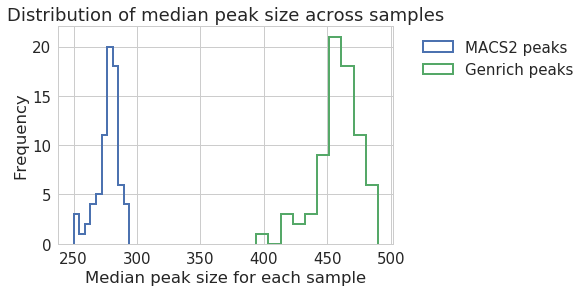

In [37]:
plt.figure()
plt.hist(median[:, 0], density=False, histtype='step', label = 'MACS2 peaks', linewidth = 2)
plt.hist(median[:, 1], density=False, histtype='step', label = 'Genrich peaks', linewidth = 2)
plt.title('Distribution of median peak size across samples')
plt.ylabel('Frequency')
plt.xlabel('Median peak size for each sample')

plt.legend(bbox_to_anchor=(1.05, 1))

plt.show()
plt.close()

In [40]:
np.median(median, axis=0)

array([278.5, 460.5])

In [ ]:
## Compare with peaks from the paper

Zenodo_dir = '/work-zfs/abattle4/heyuan/Variant_calling/datasets/GBR/Zenodo'

peaks_from_paper = '%s/peaks_loc_GRCh38.bed' % Zenodo_dir
peaks_from_paper = pd.read_csv(peaks_from_paper, sep='\t', header=None)

called_peaks = pd.read_csv('%s/union-thresholded_level10.bed' % (PEAK_DIR), sep='\t', header = None)

plt.figure(figsize=(10,5))
plt.hist(np.log10(peaks_from_paper[2] - peaks_from_paper[1]), histtype='step', label = 'from paper', linewidth = 2)
plt.hist(np.log10(called_peaks[2] - called_peaks[1]), histtype='step', label = 'seperately called - macs2', linewidth = 2)
plt.legend()
plt.title('Distribution of log10(Peak window size)\n for the union set of peaks')
plt.show()
plt.close()

In [37]:
overlap_dat = pd.read_csv('%s/peaks_overlap_with_union_peaks.bed' % Zenodo_dir, sep='\t', header = None, low_memory=False)
overlap_dat = overlap_dat[overlap_dat[7] != 0]
overlap_dat.head()

,0,1,2,3,4,5,6,7
1,1,28870,29662,Peak3,1,28717,30122,792
2,1,265673,266353,Peak4,1,265761,266291,530
3,1,267734,268295,Peak5,1,267848,268183,335
4,1,629625,630407,Peak7,1,629080,630052,427
5,1,629625,630407,Peak7,1,630178,630514,229


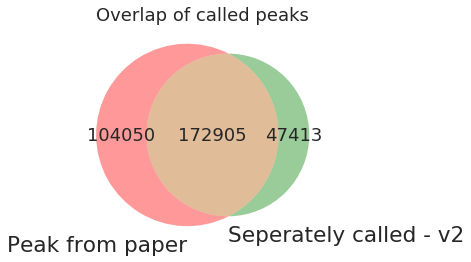

In [51]:
A = len(set(peaks_from_paper[3]))
B = len(called_peaks_v2)
AB = len(set(overlap_dat[3]))


from matplotlib_venn import venn3, venn2

plt.figure()
venn2([A-AB,B-AB,AB], ('Peak from paper', 'Seperately called - v2'))
plt.title('Overlap of called peaks')
plt.show()
plt.close()
